In [7]:
import numpy as np
import matplotlib.pyplot as plt
from hazma.scalar_mediator import ScalarMediator, HiggsPortal, HeavyQuark
from hazma.vector_mediator import VectorMediator, KineticMixing, QuarksOnly
from hazma.parameters import qe
from utilities import get_color, get_tex_label

%matplotlib inline

In [8]:
base_fig_dim = 7.07

# Phase diagram

## First draft

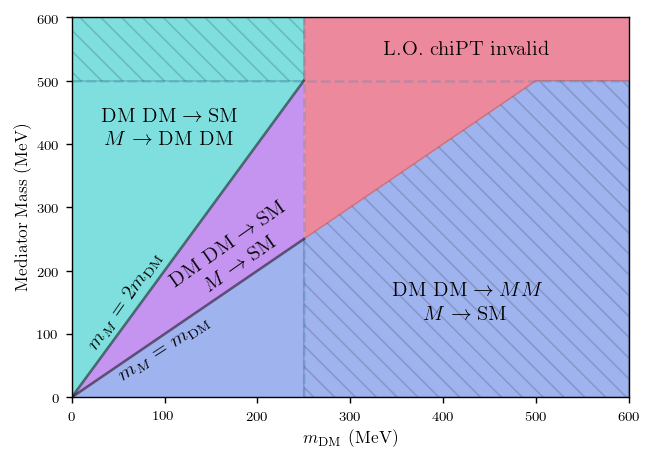

In [73]:
plt.figure(figsize=(latex_text_width_1col, 0.7*latex_text_width_1col))
plt.xlim([0., 600.])
plt.ylim([0., 600.])

plt.axvline(250., linestyle="dashed", alpha=0.2)
plt.axhline(500., linestyle="dashed", alpha=0.2)

plt.plot(np.linspace(0., 250., 150), np.linspace(0., 250., 150), c="k", alpha=0.5)
plt.plot(np.linspace(0., 250., 150), 2.0 * np.linspace(0., 250., 150), c="k", alpha=0.5)

plt.text(425., 150.,
#          r"$\mathrm{DM~DM} \to \mathrm{SM}$" + "\n" + r"Visible decays",
         r"$\mathrm{DM~DM} \to M M$" + "\n" + r"$M \to \mathrm{SM}$",
         va="center", ha="center") 
plt.fill_between([0., 500., 600.], [0., 0., 0.], [0., 500., 500.], 
                 color="royalblue", alpha=0.5, lw=0)
plt.fill([250, 500, 600, 600, 500, 250],
         [0, 0., 0., 500., 500, 250],
         fill=False, hatch='\\\\', alpha=0.15)

plt.text(105., 425.,
#          r"$\mathrm{DM~DM} \to \mathrm{SM}$" + "\n" + "Invisible Decays",
         r"$\mathrm{DM~DM} \to \mathrm{SM}$" + "\n" + r"$M \to \mathrm{DM~DM}$",
         ha="center", va="center")
plt.fill_between([0., 250.], [0., 500.],[600., 600.], 
                 color="c", alpha=0.5, lw=0)
plt.fill([0, 250, 250, 0], [500, 500, 600, 600], fill=False, hatch='\\\\', alpha=0.15)

plt.text(175., 255.,
#          r"$\mathrm{DM~DM} \to \mathrm{SM}$" + "\n" + r"Visible decays",
         r"$\mathrm{DM~DM} \to \mathrm{SM}$" + "\n" + r"$M \to \mathrm{SM}$",
         rotation=35, ha="center") 
plt.fill_between([0., 250.], [0., 250.],[0., 500.], 
                 color="blueviolet", alpha=0.5, lw=0)

plt.text(425., 550., "L.O. chiPT invalid", ha="center", va="center")
plt.fill_between([250., 500., 600], [250., 500., 500.], [600., 600., 600.], 
                 color="crimson", alpha=0.5, lw=0)

plt.text(58., 150., r"$m_{M} = 2m_{\mathrm{DM}}$",
         rotation=55, va="center", ha="center")
plt.text(100., 75., r"$m_{M} = m_{\mathrm{DM}}$",
         rotation=33, va="center", ha="center")

plt.ylabel(r"Mediator Mass (MeV)")
plt.xlabel(r"$m_{\mathrm{DM}}$ (MeV)")

plt.savefig("figures/med_and_dm_mass_phase_diagram.pdf")

## Second draft

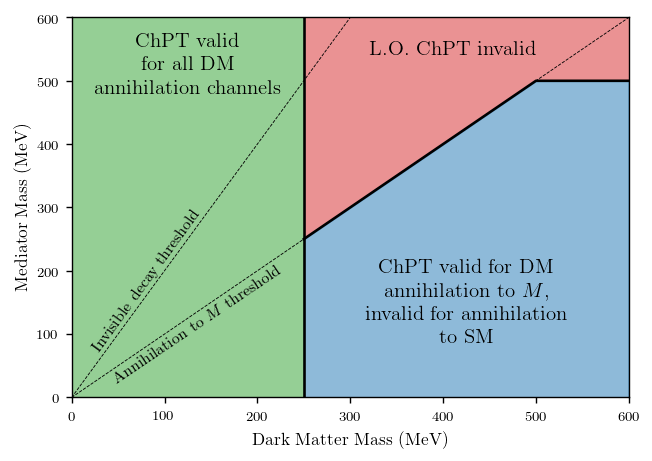

In [147]:
mx_max = 600
colors = [c["color"] for c in plt.rcParams['axes.prop_cycle']]

plt.figure(figsize=(latex_text_width_1col, 0.7*latex_text_width_1col))
plt.xlim([0., mx_max])
plt.ylim([0., mx_max])

plt.axvline(250., color='k')
plt.plot([250, 500, 600], [250, 500, 500], color='k')

plt.plot([0, mx_max], [0, mx_max], '--k', linewidth=0.5)
plt.plot([0, mx_max], [0, 2*mx_max], '--k', linewidth=0.5)

plt.fill_between([250., 500., mx_max], [0., 0., 0.], [250., 500., 500.], 
                 color=colors[0], alpha=0.5)
plt.fill_between([0., 250.], [0, 0], [mx_max, mx_max], 
                 color=colors[2], alpha=0.5, lw=0)
plt.fill_between([250., 500., 600], [250., 500., 500.], [mx_max, mx_max, mx_max], 
                 color=colors[3], alpha=0.5, lw=0)

plt.text(425., 150.,
         "ChPT valid for DM\nannihilation to $M$,\ninvalid for annihilation\nto SM",
         va="center", ha="center")

plt.text(125., 525,
         "ChPT valid\nfor all DM\nannihilation channels",
         ha="center", va="center")

plt.text(410., 550., "L.O. ChPT invalid", ha="center", va="center")

plt.text(80., 185., "Invisible decay threshold",
         rotation=54, va="center", ha="center", fontsize=9)
plt.text(135., 115, "Annihilation to $M$ threshold",
         rotation=34, va="center", ha="center", fontsize=9)

plt.ylabel("Mediator Mass (MeV)")
plt.xlabel("Dark Matter Mass (MeV)")

plt.savefig("figures/med_and_dm_mass_phase_diagram.pdf")

# Scalar branching fractions

In [36]:
mxs = np.logspace(np.log10(50), np.log10(250), 500)
mM_light = 200.
mM_heavy = 1000.
mMs = [mM_light, mM_heavy]
vx = 1e-3

sms = np.array([[HiggsPortal(100, mM, gsxx=1., stheta=1e-1)
                 for mM in mMs],
                [HeavyQuark(100, mM, gsxx=1., gsQ=1e-1, mQ=1e3, QQ=1.)
                 for mM in mMs]])
bfs = []

for row in range(2):
    bfs_temp = []
    
    for col in range(2):
        # Computes BRs for each DM mass
        bfs_raw = []
        for mx in mxs:
            sms[row, col].mx = mx
            e_cm = 2. * mx * (1 + 0.5 * vx**2)
            
            bfs_raw.append(sms[row, col].annihilation_branching_fractions(e_cm))
            
        # Convert the list of dicts into a dict of lists
        bfs_temp.append({fs: np.array([bf[fs] for bf in bfs_raw])
                         for fs in ScalarMediator.list_annihilation_final_states()})

    bfs.append(bfs_temp)
    
bfs = np.array(bfs)

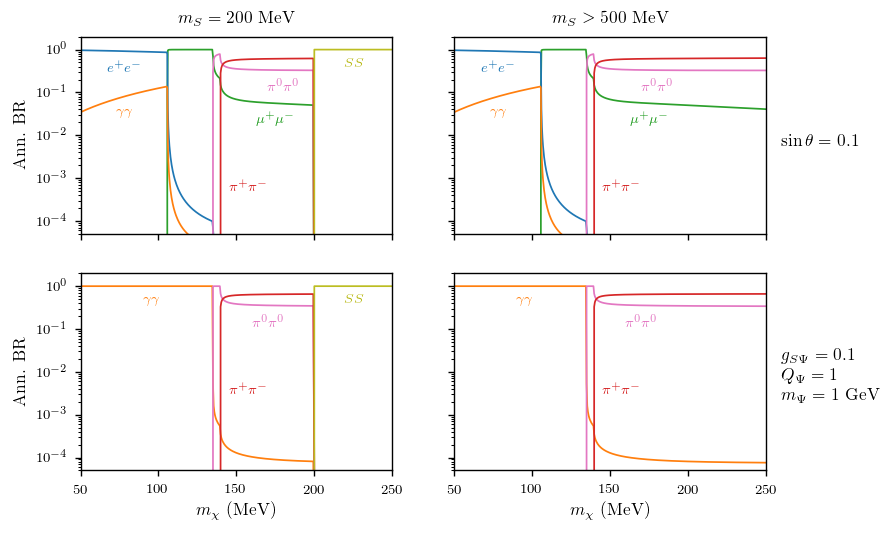

In [37]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True,
                        figsize=(7.07,
                                 0.65*7.07))

for row in range(2):
    for col in range(2):
        ax = axs[row, col]
        
        # Plot BRs
        for fs in ScalarMediator.list_annihilation_final_states():
            ax.plot(mxs, bfs[row, col][fs],
                    label=get_tex_label(fs), color=get_color(fs), linewidth=1)
        
        # Formatting
        ax.set_yscale("log")
        ax.set_xlim(mxs[[0, -1]])
        ax.set_ylim(5e-5, 2)

# Only label outer plots' axes
for idx in range(2):
    axs[1, idx].set_xlabel(r"$m_\chi$ (MeV)")
    axs[idx, 0].set_ylabel("Ann. BR")

# Label couplings
axs[0, 1].text(260, 7e-3, r"$\sin\theta = 0.1$", va="center", fontsize=10)
axs[1, 1].text(260, 7e-3,
               r"$g_{S\Psi} = 0.1$" + "\n" + r"$Q_\Psi = 1$" + "\n" + r"$m_\Psi = 1$ GeV",
               va="center", fontsize=10)

# Label mediator masses
axs[0, 0].set_title(r"$m_S = 200$ MeV", fontsize=10)
axs[0, 1].set_title(r"$m_S > 500$ MeV", fontsize=10)

# Label final states
for col in range(2):
    axs[0, col].text(78, 3e-2, r"$\gamma \gamma$",
                     color=get_color("g g"), fontsize=8, ha="center")
    axs[0, col].text(78, 3e-1, r"$e^+ e^-$",
                     color=get_color("e e"), fontsize=8, ha="center")
    axs[0, col].text(145, 5e-4, r"$\pi^+ \pi^-$",
                     color=get_color("pi pi"), fontsize=8)
    axs[0, col].text(180, 1.1e-1, r"$\pi^0 \pi^0$",
                     color=get_color("pi0 pi0"), fontsize=8, ha="center")
    axs[0, col].text(175, 1.9e-2, r"$\mu^+ \mu^-$",
                     color=get_color("mu mu"), fontsize=8, ha="center")
    
for col in range(2):
    axs[1, col].text(95, 4e-1, r"$\gamma \gamma$",
                     color=get_color("g g"), fontsize=8, ha="center")
    axs[1, col].text(145, 3e-3, r"$\pi^+ \pi^-$",
                     color=get_color("pi pi"), fontsize=8)
    axs[1, col].text(170, 1.1e-1, r"$\pi^0 \pi^0$",
                     color=get_color("pi0 pi0"), fontsize=8, ha="center")
for row in range(2):
    axs[row, 0].text(225, 4e-1, r"$S S$",
                     color=get_color("s s"), fontsize=8, ha="center")

# fig.savefig("figures/scalar_branching_fractions.pdf", bbox_inches="tight")

# Vector branching fractions

In [34]:
mxs = np.logspace(np.log10(50), np.log10(250), 500)
mM_light = 200.
mM_heavy = 1000.
mMs = [mM_light, mM_heavy]
vx = 1e-6

vms = np.array([[KineticMixing(100, mM, gvxx=1., eps=1e-1)
                 for mM in mMs],
                [QuarksOnly(100, mM, gvxx=1., gvuu=1., gvdd=-1., gvss=0.)
                 for mM in mMs],
                [QuarksOnly(100, mM, gvxx=1., gvuu=1., gvdd=1., gvss=0.)
                 for mM in mMs]])
bfs = []

for row in range(3):
    bfs_temp = []
    
    for col in range(2):
        # Computes BRs for each DM mass
        bfs_raw = []
        for mx in mxs:
            vms[row, col].mx = mx
            e_cm = 2. * mx * (1 + 0.5 * vx**2)
            
            bfs_raw.append(vms[row, col].annihilation_branching_fractions(e_cm))
            
        # Convert the list of dicts into a dict of lists
        bfs_temp.append({fs: np.array([bf[fs] for bf in bfs_raw])
                         for fs in VectorMediator.list_annihilation_final_states()})

    bfs.append(bfs_temp)
    
bfs = np.array(bfs)

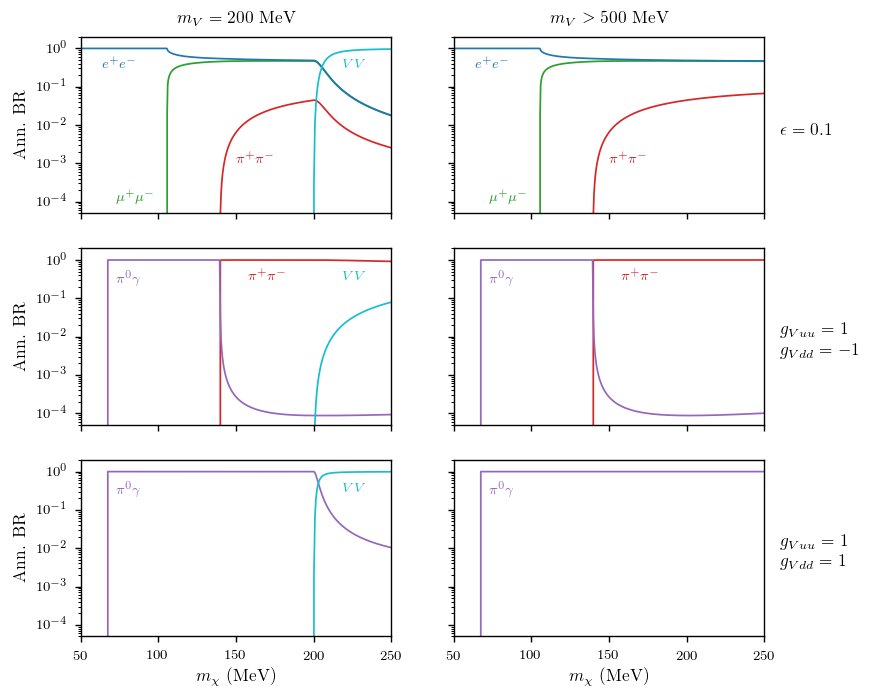

In [35]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True,
                        figsize=(latex_text_width_1col,
                                 0.9*latex_text_width_1col))

for row in range(3):
    for col in range(2):
        ax = axs[row, col]
        
        # Plot BRs
        for fs in VectorMediator.list_annihilation_final_states():
            ax.plot(mxs, bfs[row, col][fs],
                    label=get_tex_label(fs), color=get_color(fs), linewidth=1)
        
        # Formatting
        ax.set_yscale("log")
        ax.set_xlim(mxs[[0, -1]])
        ax.set_ylim(5e-5, 2)

# Only label outer plots' axes
for col in range(2):
    axs[2, col].set_xlabel(r"$m_\chi$ (MeV)")
for row in range(3):
    axs[row, 0].set_ylabel("Ann. BR")

# Label couplings
axs[0, 1].text(260, 7e-3, r"$\epsilon = 0.1$",va="center", fontsize=10)
axs[1, 1].text(260, 7e-3, r"$g_{Vuu} = 1$" + "\n" + r"$g_{Vdd} = -1$",
               va="center", fontsize=10)
axs[2, 1].text(260, 7e-3, r"$g_{Vuu} = 1$" + "\n" + r"$g_{Vdd} = 1$",
               va="center", fontsize=10)

# Label mediator masses
axs[0, 0].set_title(r"$m_V = 200$ MeV", fontsize=10)
axs[0, 1].set_title(r"$m_V > 500$ MeV", fontsize=10)

# Label final states
for col in range(2):
    axs[0, col].text(75, 3e-1, r"$e^+ e^-$",
                     color=get_color("e e"), fontsize=8, ha="center")
    axs[0, col].text(73, 1e-4, r"$\mu^+ \mu^-$", color=get_color("mu mu"), fontsize=8)
    axs[0, col].text(150, 1e-3, r"$\pi^+ \pi^-$", color=get_color("pi pi"), fontsize=8)
    axs[1, col].text(170, 3e-1, r"$\pi^+ \pi^-$",
                     color=get_color("pi pi"), fontsize=8, ha="center")
for row in range(3):
    axs[row, 0].text(225, 3e-1, r"$V V$",
                     color=get_color("v v"), fontsize=8, ha="center")
for row in range(1, 3):
    for col in range(2):
        axs[row, col].text(73, 2.5e-1, r"$\pi^0 \gamma$",
                           color=get_color("pi0 g"), fontsize=8)

# fig.savefig("figures/vector_branching_fractions.pdf", bbox_inches="tight")

# Branching fractions

In [9]:
eps = 1.0e-1


SM = ScalarMediator(250., 700., 1., 1., 1., 1. )
VM = VectorMediator(250., 700., 1., 
                    2. / 3. * eps * qe, 
                    -1. / 3. * eps * qe, 
                    -1. / 3. * eps * qe, 
                    -1 * eps * qe, 
                    -1 * eps * qe)
VM = VectorMediator(250., 700., 1., 
                    1., 0, 0, 0, 0)

## $m_{S} < m_{\chi}$

/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value 

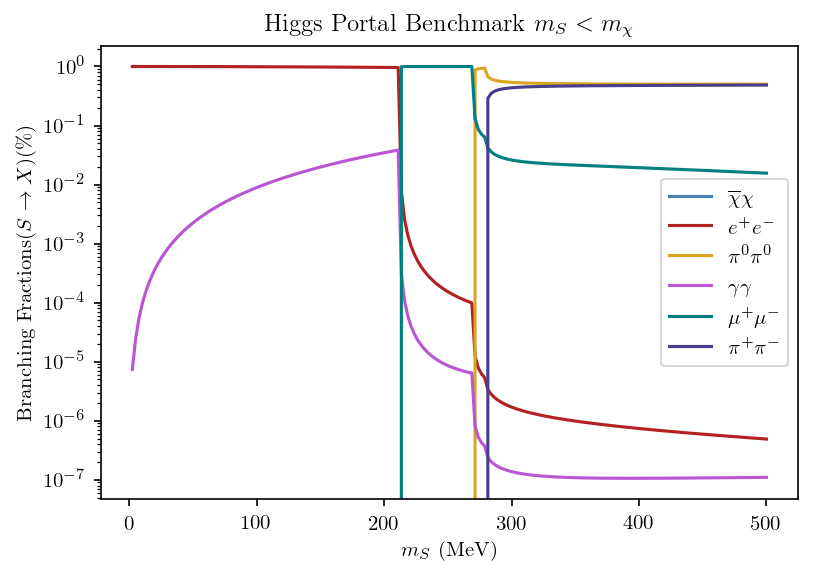

In [149]:
mx = 250.
mss = np.linspace(0., 2. * mx, 200)

stheta = 1e-3
gsxx = 1.
gsff = stheta
gsGG = 3.0 * stheta
gsFF = -5. / 6. * stheta

SMS = np.array([ScalarMediator(mx, ms, gsxx, gsff , gsGG, gsFF) for ms in mss])
sm_widths = np.array([SM.partial_widths() for SM in SMS])

widths_dict = {"e e" : np.array([sm_width["e e"] / sm_width["total"] for sm_width in sm_widths]),
"x x" : np.array([sm_width["x x"] / sm_width["total"] for sm_width in sm_widths]),
"mu mu" : np.array([sm_width["mu mu"] / sm_width["total"] for sm_width in sm_widths]),
"pi0 pi0" :np.array([sm_width["pi0 pi0"] / sm_width["total"] for sm_width in sm_widths]),
"pi pi" : np.array([sm_width["pi pi"] / sm_width["total"] for sm_width in sm_widths]),
"g g" : np.array([sm_width["g g"] / sm_width["total"] for sm_width in sm_widths])
}

tex_labels = {"e e": r"$e^{+} e^{-}$",
             "mu mu": r"$\mu^{+} \mu^{-}$",
             "g g": r"$\gamma \gamma$", 
             "pi0 pi0": r"$\pi^{0} \pi^{0}$",
             "pi pi": r"$\pi^{+} \pi^{-}$",
             "x x" : r"$\overline{\chi}\chi$"}

plt.figure(dpi=150)
plt.xlabel(r"$m_{S}$ (MeV)")
plt.ylabel(r"Branching Fractions$(S\to X) (\%)$")
plt.title(r"Higgs Portal Benchmark $m_{S} < m_{\chi}$")
plt.yscale("log")
plt.xscale("linear")
for key in widths_dict.keys():
    plt.plot(mss, widths_dict[key], label=tex_labels[key])
plt.legend()

## $m_{S} > m_{\chi}$

In [ ]:
SM.branching_fractions()

In [150]:
def v_to_cme(v, mx):
    return 2.0 * mx + mx * v**2

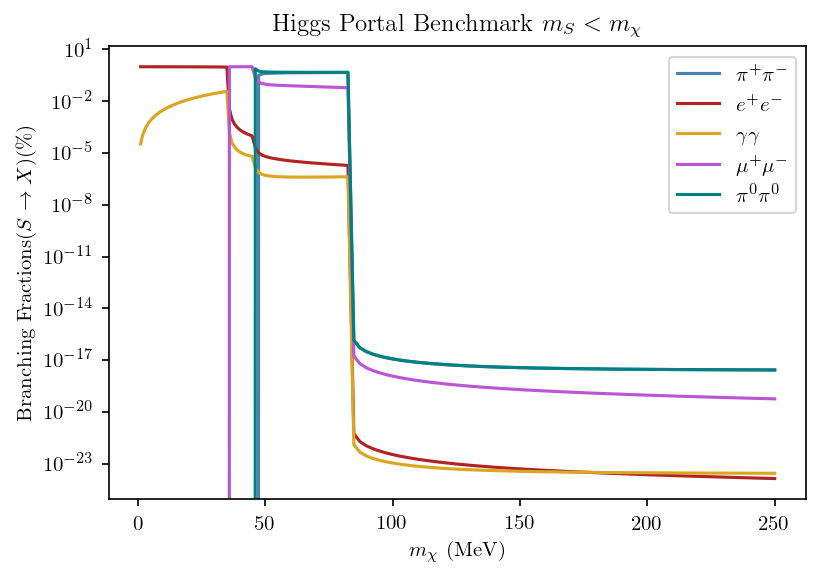

In [161]:
ms = 250.
mxs = np.logspace(0., np.log10(ms), 200)
vrel = 1.0-3

stheta = 1e-3
gsxx = 1.
gsff = stheta
gsGG = 3.0 * stheta
gsFF = -5. / 6. * stheta

SMS = np.array([ScalarMediator(mx, ms, gsxx, gsff , gsGG, gsFF) for mx in mxs])
sm_bfs = np.array([SM.branching_fractions(v_to_cme(vrel, SM.mx)) for SM in SMS])

bfs_dict = {"e e" : np.array([sm_bf["e e"]  for sm_bf in sm_bfs]),
"mu mu" : np.array([sm_bf["mu mu"]  for sm_bf in sm_bfs]),
"pi0 pi0" :np.array([sm_bf["pi0 pi0"]  for sm_bf in sm_bfs]),
"pi pi" : np.array([sm_bf["pi pi"]  for sm_bf in sm_bfs]),
"g g" : np.array([sm_bf["g g"]  for sm_bf in sm_bfs])
}

tex_labels = {"e e": r"$e^{+} e^{-}$",
             "mu mu": r"$\mu^{+} \mu^{-}$",
             "g g": r"$\gamma \gamma$", 
             "pi0 pi0": r"$\pi^{0} \pi^{0}$",
             "pi pi": r"$\pi^{+} \pi^{-}$",
             "x x" : r"$\overline{\chi}\chi$"}

plt.figure(dpi=150)
plt.xlabel(r"$m_{\chi}$ (MeV)")
plt.ylabel(r"Branching Fractions$(S\to X) (\%)$")
plt.title(r"Higgs Portal Benchmark $m_{S} < m_{\chi}$")
plt.yscale("log")
plt.xscale("linear")
for key in bfs_dict.keys():
    plt.plot(mxs, bfs_dict[key], label=tex_labels[key])
plt.legend()